In [14]:
#Import Required Libraries
#Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

#Models et al
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
#from sklearn.preprocessing import CategoricalEncoder  #Not yet released!


#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
# Load the data
df_fa = pd.read_pickle('features_all.pkl')  #Pickle format preserves file as python object
df_tf = pd.read_pickle('tf.pkl')

In [16]:
df_fa.head()

,city,bd,gender,registerd_via,registration_init_time,is_churn,"(date_features, date, max_date)","(date_features, date, min_date)","(date_features, date, listening_tenure)","(within_days_7, num_unq, sum)",...,"(within_days_999, num_25, sum)","(within_days_999, num_25, mean)","(within_days_999, num_50, sum)","(within_days_999, num_50, mean)","(within_days_999, num_75, sum)","(within_days_999, num_75, mean)","(within_days_999, num_985, sum)","(within_days_999, num_985, mean)","(within_days_999, num_100, sum)","(within_days_999, num_100, mean)"
msno,,,,,,,,,,,,,,,,,,,,,
SlQEFsP8unoHeCV5naZtlhd9klqGJyTkYXaudM1ls1s=,1,0,NaN,13,20160918,0,2017-02-28,2016-09-20,161,18,...,332,2.886957,182,1.582609,99,0.860870,151,1.313043,2787,24.234783
0XXpgJ9L7btDN0H/y+R5sRwIFDxDiRoRPU1U/jh1f9M=,1,0,NaN,13,20161224,0,2017-02-28,2017-01-16,43,35,...,170,11.333333,40,2.666667,8,0.533333,4,0.266667,87,5.800000
JAyCmh9aHTsNe79eT0qtdU7VubhYitygdTdU4T3fZlA=,1,0,NaN,13,20170121,0,2017-02-28,2017-01-21,38,20,...,221,9.208333,55,2.291667,16,0.666667,11,0.458333,279,11.625000
XzwNNw5S1qNCNjjF23l6DVe8vuWRPFmIy6bmnZVq8Qo=,1,0,NaN,13,20161004,0,2017-02-28,2016-10-04,147,130,...,1146,8.426471,150,1.102941,127,0.933824,113,0.830882,5182,38.102941
zXjQ9f4C/uJHWw5guWICNbkFBydqdrz77Apch1nyDQ4=,1,0,NaN,13,20170108,0,2017-02-28,2017-01-09,50,16,...,17,0.809524,15,0.714286,7,0.333333,3,0.142857,246,11.714286


In [17]:
#Some quick wrangling

#Fix column headers
df_fa.columns = df_fa.columns.map(''.join)

#Join in Transactions
df_fa = df_fa.join(df_tf, how='inner')

#Drop erroring date fields
#FUTURE: Convert dates to Y, M, D  ######### IMPORTANT, DO THIS!!!!   ###########
df_fa.drop('date_featuresdatemax_date', axis=1, inplace=True)
df_fa.drop('date_featuresdatemin_date', axis=1, inplace=True)
df_fa.drop('transaction_date', axis=1, inplace=True)
df_fa.drop('membership_expire_date', axis=1, inplace=True)

#Convert gender variable (string) to dummy encoding
dummy = pd.get_dummies(df_fa['gender'])
df_fa = pd.concat([df_fa, dummy], axis=1)
df_fa.drop('gender', axis=1, inplace=True)


#Drop the msno (user id) column ... no longer needed with pkl file
#df_fa.drop('msno', axis=1, inplace=True)

#Label missing genders as unspecified
#ToDo

In [18]:
#summary
df_fa.head()

,city,bd,registerd_via,registration_init_time,is_churn,date_featuresdatelistening_tenure,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,...,Total_amount_paid,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,amount_paid_per_day,female,male
msno,,,,,,,,,,,,,,,,,,,,,
SlQEFsP8unoHeCV5naZtlhd9klqGJyTkYXaudM1ls1s=,1,0,13,20160918,0,161,18,4.500000,4,24076.306,...,745,30,30,149,149,1,0,4.966667,0,0
0XXpgJ9L7btDN0H/y+R5sRwIFDxDiRoRPU1U/jh1f9M=,1,0,13,20161224,0,43,35,17.500000,2,7937.548,...,387,30,30,129,129,1,0,4.300000,0,0
JAyCmh9aHTsNe79eT0qtdU7VubhYitygdTdU4T3fZlA=,1,0,13,20170121,0,38,20,6.666667,3,4013.388,...,200,30,30,100,100,1,0,3.333333,0,0
XzwNNw5S1qNCNjjF23l6DVe8vuWRPFmIy6bmnZVq8Qo=,1,0,13,20161004,0,147,130,18.571429,7,42123.669,...,645,30,30,129,129,1,0,4.300000,0,0
zXjQ9f4C/uJHWw5guWICNbkFBydqdrz77Apch1nyDQ4=,1,0,13,20170108,0,50,16,4.000000,4,3538.666,...,258,30,30,129,129,1,0,4.300000,0,0


In [12]:
#Easier to check this way
#df_fa.to_csv('df_fa.csv')

In [52]:
#Split data into a) train, dev, & test, b) data & labels

np.random.seed(5)  #Set so that % churn is somewhat consistent

#Train, Dev, Test splits: 60/25/15
train, devtest = train_test_split(df_fa, test_size=0.4)
dev, test = train_test_split(devtest, test_size=15/40)

#Check churn percentages
print('Check churn percentages:')
print('  All data, % churn: {:.1%}'.format(df_fa['is_churn'].sum() / df_fa['is_churn'].count()))
print('Train data, % churn: {:.1%}'.format(train['is_churn'].sum() / train['is_churn'].count()))
print('  Dev data, % churn: {:.1%}'.format(dev['is_churn'].sum() / dev['is_churn'].count()))
print(' Test data, % churn: {:.1%}'.format(test['is_churn'].sum() / test['is_churn'].count()))

#Split data / labels
train_labels = train['is_churn']
train_data = train.drop('is_churn', axis=1)
dev_labels = dev['is_churn']
dev_data = dev.drop('is_churn', axis=1)
test_labels = test['is_churn']
test_data = test.drop('is_churn', axis=1)

print('\nCheck data sizes:')
print('Train data / test: ', train_data.shape, train_labels.shape)
print('  Dev data / test: ', dev_data.shape, dev_labels.shape)
print(' Test data / test: ', test_data.shape, test_labels.shape)

#Baseline (if we guess all 0's, this is what we get)
print('\nBaseline Accuracy: {:.2%}'.format(1-(dev['is_churn'].sum() / dev['is_churn'].count())))

Check churn percentages:
  All data, % churn: 6.1%
Train data, % churn: 6.1%
  Dev data, % churn: 6.0%
 Test data, % churn: 6.0%

Check data sizes:
Train data / test:  (10425, 121) (10425,)
  Dev data / test:  (4343, 121) (4343,)
 Test data / test:  (2607, 121) (2607,)

Baseline Accuracy: 94.04%


In [41]:
#Scale / normalize data?  Consider doing this if needed.

#Migrate from pandas to numpy?  Also consider if needed.

Baseline Accuracy: 94.04%


In [53]:
#NB Attempt
clf_NB_Gauss = GaussianNB()
clf_NB_Gauss.fit(train_data, train_labels)
print('Accuracy: {:.2%}'.format(clf_NB_Gauss.score(dev_data, dev_labels)))
#Awful!

Accuracy: 5.99%


In [54]:
clf_neigh = KNeighborsClassifier(n_neighbors=3)
clf_neigh.fit(train_data, train_labels)
print('Accuracy: {:.2%}'.format(clf_neigh.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_neigh.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_neigh.predict(dev_data)))


Accuracy: 93.35%
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      4084
          1       0.11      0.02      0.03       259

avg / total       0.89      0.93      0.91      4343

[[4050   34]
 [ 255    4]]


0.94036380382224272

In [55]:
### Random Forest Attempt
clf_RF = RandomForestClassifier(n_jobs=-1, random_state=12, class_weight={0: 1, 1: 1}, criterion='gini')
clf_RF.fit(train_data, train_labels)
print('Accuracy: {:.2%}'.format(clf_RF.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_RF.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_RF.predict(dev_data)))

Accuracy: 95.35%
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      4084
          1       0.68      0.42      0.52       259

avg / total       0.95      0.95      0.95      4343

[[4033   51]
 [ 151  108]]


In [57]:
#### SVM Attempts
clf_SVM = svm.SVC(kernel='linear', C=1, class_weight='balanced', verbose=True, max_iter=10000)
clf_SVM.fit(train_data, train_labels)
print('\nAccuracy: {:.2%}'.format(clf_SVM.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_SVM.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_SVM.predict(dev_data)))

[LibSVM]
Accuracy: 93.51%
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      4084
          1       0.04      0.00      0.01       259

avg / total       0.89      0.94      0.91      4343

[[4060   24]
 [ 258    1]]


C:\Users\camke\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Confusion matrix, without normalization
[[4033   51]
 [ 151  108]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.58  0.42]]


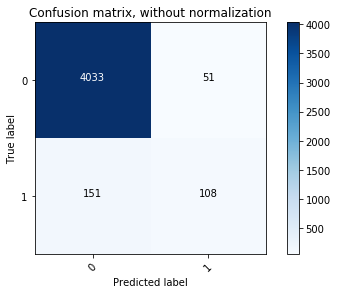

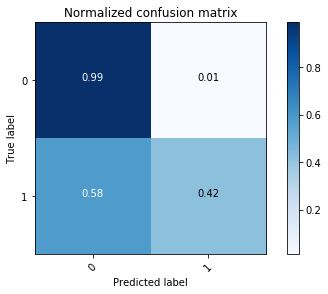

In [58]:
#Plot accuracy results ('stole' this code from sklearn documentation)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = [0, 1]
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(dev_labels, clf_RF.predict(dev_data))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
clf_RF.predict(dev_data)

Let's think about our output.  Do we give probabilities?  That might help them target better.